## Exploratory analysis of wildfire data
The following notebook will explore trends across the three wildfire seasons, and compare it with the air quality data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num

In [3]:
# read in cleaned weather and air quality files
AQ_data = pd.read_csv('FarmingtonCommunityHall_AQ.csv')
wf_data = pd.read_csv('wildfire_data.csv')

In [4]:
# Reset index to datetime
AQ_data = AQ_data.set_index(pd.DatetimeIndex(AQ_data['Datetime']))
wf_data = wf_data.set_index(pd.DatetimeIndex(wf_data['Datetime']))

# Calculate the mean of all pollutants over a 24 period
AQ_daily = AQ_data.resample('D').mean()

AQ_daily.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2019-01-01,0.820833,0.333333,0.268750,0.543750,0.183333,37.122917
2019-01-02,0.739583,0.283333,0.229167,0.510417,0.104167,37.287500
2019-01-03,6.056250,0.297917,0.677083,5.362500,0.110417,28.483333
2019-01-04,6.258333,0.687500,0.377083,5.879167,0.172917,24.160417
2019-01-05,5.381250,1.010417,0.737500,4.652083,0.139583,26.127083


In [5]:
wf_data.head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause
Datetime,,,,,
2019-05-20,2019-05-20,Fontas River,Prince George,650.0,Natural
2019-05-11,2019-05-11,Lejac,Prince George,236.0,Human
2019-05-11,2019-05-11,Coffee Creek Subdivision,Prince George,9.0,human
2019-05-13,2019-05-13,Richter Creek,Kamloops,507.0,unknown
2019-05-27,2019-05-27,Black Angus Creek,Northwest,1935.0,Natural


In [6]:
# combine cleaned file into one dataframe
AQ_wf_daily = wf_data.merge(right=AQ_daily, how = 'right', left_index=True,
                            right_index=True)
# Reset DateTimeIndex
AQ_wf_daily = AQ_wf_daily.set_index(pd.DatetimeIndex(AQ_wf_daily['Datetime']))

# view combined df
AQ_wf_daily.head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,0.820833,0.333333,0.268750,0.543750,0.183333,37.122917
NaT,NaN,NaN,NaN,NaN,NaN,0.739583,0.283333,0.229167,0.510417,0.104167,37.287500
NaT,NaN,NaN,NaN,NaN,NaN,6.056250,0.297917,0.677083,5.362500,0.110417,28.483333
NaT,NaN,NaN,NaN,NaN,NaN,6.258333,0.687500,0.377083,5.879167,0.172917,24.160417
NaT,NaN,NaN,NaN,NaN,NaN,5.381250,1.010417,0.737500,4.652083,0.139583,26.127083


In [25]:
wf_data['year'] = wf_data.index.year
wf_data['month'] = wf_data.index.month

wf_data.sort_values(by='Hectares Burned',ascending=False).head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause,year,month
Datetime,,,,,,,
2021-06-28,2021-06-28,Sparks Lake,Kamloops,95980.0,Human,2021,6
2021-06-30,2021-06-30,Lytton Creek,Kamloops,83671.0,Undetermined,2021,6
2021-07-13,2021-07-13,White Rock Lake,Kamloops,83342.0,Undetermined,2021,7
2021-07-08,2021-07-08,5 km West of Flat Lake,Cariboo,73862.0,Natural,2021,7
2021-07-12,2021-07-12,Tremont Creek,Kamloops,63548.0,Undetermined,2021,7


In [10]:
# Subset into three different years for boxplot
wf_2019 = wf_data[wf_data['year'] == 2019]
wf_2020 = wf_data[wf_data['year'] == 2020]
wf_2021 = wf_data[wf_data['year'] == 2021]

Now that our dataset is prepared, we'll look at the size of wildfires in each fire centre over the three year period.

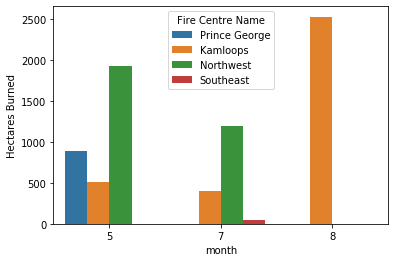

In [31]:
# Draw a barplot to show area burned by month and fire centre, Year 2019
sns.barplot(x="month", y="Hectares Burned",
            hue="Fire Centre Name",
            data=wf_2019,
            estimator=sum,
            ci=None,
            palette=['C0','C1','C2','C3'])

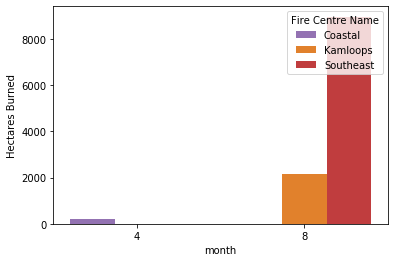

In [32]:
# Draw a barplot to show area burned by month and fire centre, Year 2019
sns.barplot(x="month", y="Hectares Burned",
            hue="Fire Centre Name",
            data=wf_2020,
            estimator=sum,
            ci=None,
            palette=['C4','C1','C3'])

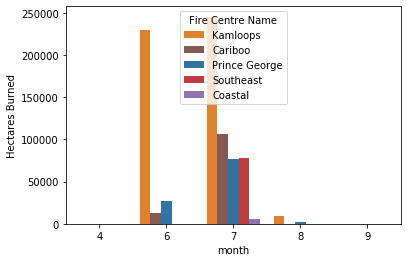

In [35]:
# Draw a barplot to show area burned by month and fire centre, Year 2019
sns.barplot(x="month", y="Hectares Burned",
            hue="Fire Centre Name",
            data=wf_2021,
            estimator=sum,
            ci=None,
            palette=['C1','C5','C0','C3','C4'])

We can see that in 2021, a much larger area of land burned. The largest area burned was in Kamloops. The fire centre in which our AQ is measured (Prince George) also had large wildfires.

Next, let's look only at the wildfires of note in Prince George Fire Centre. Perhaps the wildfires impacted air quality at our station.

In [37]:
prince_george = wf_data[wf_data['Fire Centre Name'] == 'Prince George'].sort_values(by='Hectares Burned', ascending=False)
prince_george.head(20)

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause,year,month
Datetime,,,,,,,
2021-07-02,2021-07-02,Cutoff Creek,Prince George,33418.0,Natural,2021,7
2021-07-02,2021-07-02,Black Pine,Prince George,16314.0,Natural,2021,7
2021-07-01,2021-07-01,Mount Porter,Prince George,13659.0,Natural,2021,7
2021-06-30,2021-06-30,Klawli Lake,Prince George,8412.0,Natural,2021,6
2021-07-04,2021-07-04,Forres Mountain,Prince George,7770.0,Natural,2021,7
2021-06-28,2021-06-28,Buckinghorse,Prince George,6399.0,Natural,2021,6
2021-07-10,2021-07-10,Grizzly Lake,Prince George,4891.0,Natural,2021,7
2021-06-29,2021-06-29,Minnaker Creek,Prince George,3470.0,Natural,2021,6
2021-06-30,2021-06-30,Tent Fire Creek,Prince George,3380.0,Natural,2021,6


The five largest wildfires started within a five-day period, between June 30 and July 4 2021. We don't have data on how long these wildfires burned, but we will assume that if we were to see any impacts on air quality, it would occur around this time period.

Next, we'll label the air pollutant time series with the start of the wildfires.

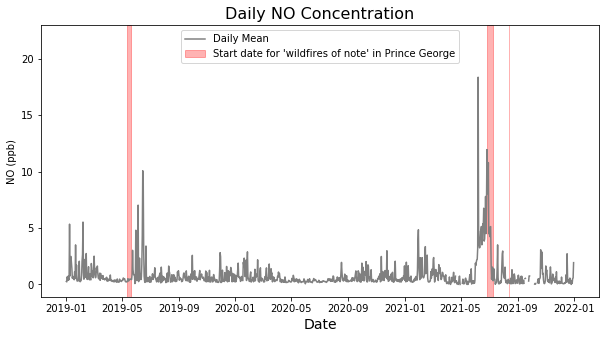

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(AQ_daily.index, AQ_daily['NO'], 'gray', label = 'Daily Mean')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('NO (ppb)')

ax.axvspan(date2num(datetime(2021,6,28,0)), date2num(datetime(2021,7,10,23)),
           label="Start date for 'wildfires of note' in Prince George",color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2021,8,13,0)), date2num(datetime(2021,8,13,23)),
           color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2019,5,11,0)), date2num(datetime(2019,5,20,23)),
           color="red", alpha=0.3)

ax.legend()

ax.set_title('Daily NO Concentration', fontsize=16)
plt.show()

It looks like there are possible wildfire impacts on NO, but it's unclear without knowing how long the fires last or their exact location.

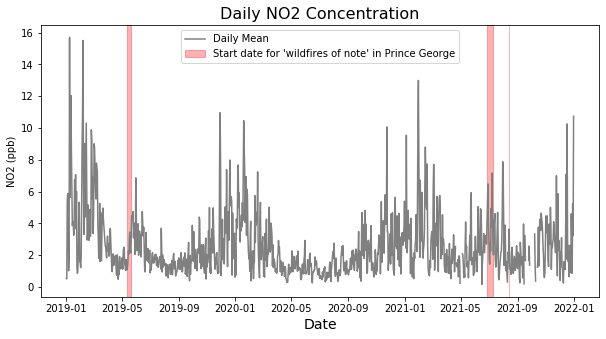

In [43]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(AQ_daily.index, AQ_daily['NO2'], 'gray', label = 'Daily Mean')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('NO2 (ppb)')

ax.axvspan(date2num(datetime(2021,6,28,0)), date2num(datetime(2021,7,10,23)),
           label="Start date for 'wildfires of note' in Prince George",color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2021,8,13,0)), date2num(datetime(2021,8,13,23)),
           color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2019,5,11,0)), date2num(datetime(2019,5,20,23)),
           color="red", alpha=0.3)

ax.legend()

ax.set_title('Daily NO2 Concentration', fontsize=16)

plt.show()

There are no clear signals that wildfires are impacting NO2 concentrations.

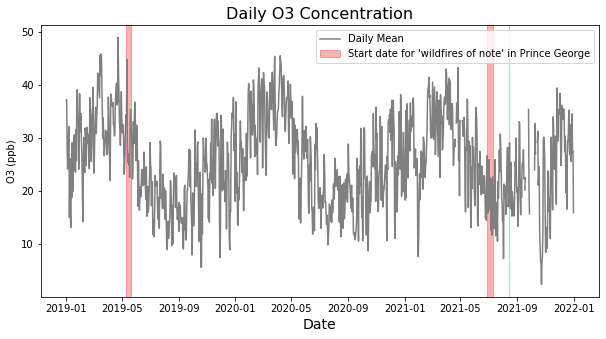

In [44]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(AQ_daily.index, AQ_daily['O3'], 'gray', label = 'Daily Mean')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('O3 (ppb)')

ax.axvspan(date2num(datetime(2021,6,28,0)), date2num(datetime(2021,7,10,23)),
           label="Start date for 'wildfires of note' in Prince George",color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2021,8,13,0)), date2num(datetime(2021,8,13,23)),
           color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2019,5,11,0)), date2num(datetime(2019,5,20,23)),
           color="red", alpha=0.3)

ax.legend()

ax.set_title('Daily O3 Concentration', fontsize=16)

plt.show()

There are definitely no wildfire impacts on O3.

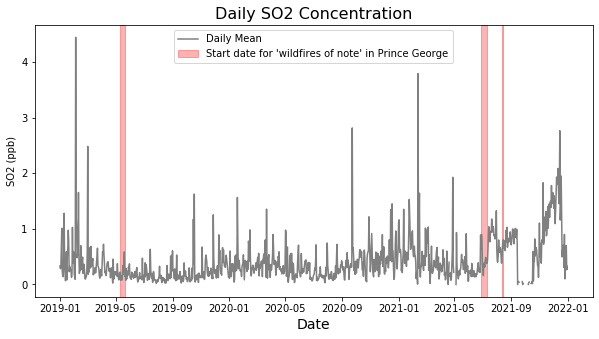

In [45]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(AQ_daily.index, AQ_daily['SO2'], 'gray', label = 'Daily Mean')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('SO2 (ppb)')

ax.axvspan(date2num(datetime(2021,6,28,0)), date2num(datetime(2021,7,10,23)),
           label="Start date for 'wildfires of note' in Prince George",color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2021,8,13,0)), date2num(datetime(2021,8,13,23)),
           color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2019,5,11,0)), date2num(datetime(2019,5,20,23)),
           color="red", alpha=0.3)

ax.legend()

ax.set_title('Daily SO2 Concentration', fontsize=16)

plt.show()

It looks like the 2021 wildfires might have led to an increase in SO2, but is this just a coincidence?

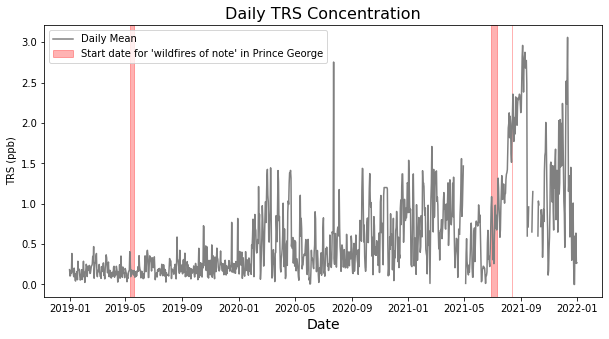

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(AQ_daily.index, AQ_daily['TRS'], 'gray', label = 'Daily Mean')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('TRS (ppb)')

ax.axvspan(date2num(datetime(2021,6,28,0)), date2num(datetime(2021,7,10,23)),
           label="Start date for 'wildfires of note' in Prince George",color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2021,8,13,0)), date2num(datetime(2021,8,13,23)),
           color="red", alpha=0.3)

ax.axvspan(date2num(datetime(2019,5,11,0)), date2num(datetime(2019,5,20,23)),
           color="red", alpha=0.3)

ax.legend()

ax.set_title('Daily TRS Concentration', fontsize=16)

plt.show()

Similar to SO2, it's possible that wildfires are impacitng TRS concentrations, but the increases in winter 2021/2022 indicate this may be a coincidence.